<a href="https://colab.research.google.com/github/kirath2205/Information-Retrieval/blob/main/Sentiment_Analysis_More_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
modi = pd.read_csv('Modi.csv')
finance = pd.read_csv('financial_data.csv')

In [ ]:
finance.shape

(5842, 2)

In [ ]:
modi.shape

(23941, 2)

In [ ]:
finance.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
modi.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
import numpy as np


finance_pos = np.array(finance[finance['Sentiment']=='positive']['Sentence'])
finance_neu = np.array(finance[finance['Sentiment']=='neutral']['Sentence'])
finance_neg = np.array(finance[finance['Sentiment']=='negative']['Sentence'])

In [ ]:
modi_pos = np.array(modi[modi['category']==1]['clean_text'])
modi_neu = np.array(modi[modi['category']==0]['clean_text'])
modi_neg = np.array(modi[modi['category']==-1]['clean_text'])

In [ ]:
print(len(finance_pos))
print(len(finance_neu))
print(len(finance_neg))

1852
3130
860


In [ ]:
modi_pos_req = modi_pos[:868]
modi_neu_req = modi_neu[:969]
modi_neg_req = modi_neg[:1386]

finance_pos_req = finance_pos[:869]
finance_neu_req = finance_neu[:969]
finance_neg_req = finance_neg[:430]

In [ ]:
import numpy as np
import pandas as pd



X = np.array([])
y = np.array([])

bmw = pd.read_csv('BMW_Labelled.csv')
bmw = bmw[(bmw['Sentiment']==1) | (bmw['Sentiment']==0) | (bmw['Sentiment']==-1)]
bmw.reset_index(inplace=True, drop=True)

for i in range(len(bmw)):
    X = np.append(X,bmw['tweet'][i])
    y = np.append(y,bmw['Sentiment'][i])


tesla = pd.read_csv('labelled_data_tesla.csv')
tesla = tesla[(tesla['Sentiment']==1) | (tesla['Sentiment']==0) | (tesla['Sentiment']==-1)]
tesla.reset_index(inplace=True, drop=True)

for i in range(len(tesla)):
    X = np.append(X,tesla['tweet'][i])
    y = np.append(y,tesla['Sentiment'][i])



for i in range(len(modi_pos_req)):
    X = np.append(X,modi_pos_req[i])
    y = np.append(y,1)

for i in range(len(finance_pos_req)):
    X = np.append(X,finance_pos_req[i])
    y = np.append(y,1)


for i in range(len(modi_neu_req)):
    X = np.append(X,modi_neu_req[i])
    y = np.append(y,0)

for i in range(len(finance_neu_req)):
    X = np.append(X,finance_neu_req[i])
    y = np.append(y,0)


for i in range(len(modi_neg_req)):
    X = np.append(X,modi_neg_req[i])
    y = np.append(y,-1)

for i in range(len(finance_neg_req)):
    X = np.append(X,finance_neg_req[i])
    y = np.append(y,-1)






In [ ]:

pos=0
neu=0
neg=0
for i in range(len(y)):
    if y[i]==1:
        pos+=1
    elif y[i]==0:
        neu+=1
    else:
        neg+=1
print(pos,neu,neg)


526 123 368


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Run these two lines only once
nltk.download('stopwords')
nltk.download('wordnet')



def preprocessSingleTweet(tweet):

    tweet = str(tweet)
    
    #Removing urls and stripping whitespaces
    tweet = re.sub(r'http\S+', '', str(tweet))
    tweet = tweet.strip()

    #Removing hashtags and mentions
    tweet = ' '.join([word for word in tweet.split() if word[0]!='@' and word[0]!='#'])


    #Removing Punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    #Lowercasing all texts, removing stopwords, and lemmatizing the texts
    stopwordsList = stopwords.words('english') 
    lemmatizer = WordNetLemmatizer()
    
    tweet = tweet.lower()
    tweet = ' '.join([word for word in tweet.split() if word not in stopwordsList])
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split()])

    return tweet


for i in range(len(X)):
    X[i] = preprocessSingleTweet(X[i])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:

import numpy as np
 
train_size = 0.9

pos_indices_arr = []
neu_indices_arr = []
neg_indices_arr = []

for i in range(len(y)):
    if y[i]==1:
        pos_indices_arr.append(i)
    elif y[i]==0:
        neu_indices_arr.append(i)
    else:
        neg_indices_arr.append(i)

X_pos = X[pos_indices_arr]
X_neu = X[neu_indices_arr]
X_neg = X[neg_indices_arr]





np.random.shuffle(X_pos)
np.random.shuffle(X_neu)
np.random.shuffle(X_neg)

X_train_pos = X_pos[:int(np.floor(train_size*len(X_pos)))]
X_train_neu = X_neu[:int(np.floor(train_size*len(X_neu)))]
X_train_neg = X_neg[:int(np.floor(train_size*len(X_neg)))]

y_train_pos = np.array([1]*len(X_train_pos))
y_train_neu = np.array([0]*len(X_train_neu))
y_train_neg = np.array([-1]*len(X_train_neg))

X_test_pos = X_pos[int(np.floor(train_size*len(X_pos))):]
X_test_neu = X_neu[int(np.floor(train_size*len(X_neu))):]
X_test_neg = X_neg[int(np.floor(train_size*len(X_neg))):]

y_test_pos = np.array([1]*len(X_test_pos))
y_test_neu = np.array([0]*len(X_test_neu))
y_test_neg = np.array([-1]*len(X_test_neg))


X_train = np.concatenate((X_train_pos, X_train_neu, X_train_neg),axis=None)
y_train = np.concatenate((y_train_pos, y_train_neu, y_train_neg),axis=None)
X_test = np.concatenate((X_test_pos, X_test_neu, X_test_neg),axis=None)
y_test = np.concatenate((y_test_pos, y_test_neu, y_test_neg),axis=None)








In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 5000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
print(len(word_index))

4305


In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = 100
padding_type='post'
truncation_type='post'

from keras.preprocessing.sequence import pad_sequences

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)


In [ ]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2022-04-09 19:07:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-09 19:07:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-09 19:07:12--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [ ]:
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [ ]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint


#Bidirectional LSTM based model
model = Sequential([
                                    
    embedding_layer,
    Bidirectional(LSTM(16, dropout=0.5, recurrent_dropout=0.5)),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer='l2'),
   Dense(3, activation='softmax')
])






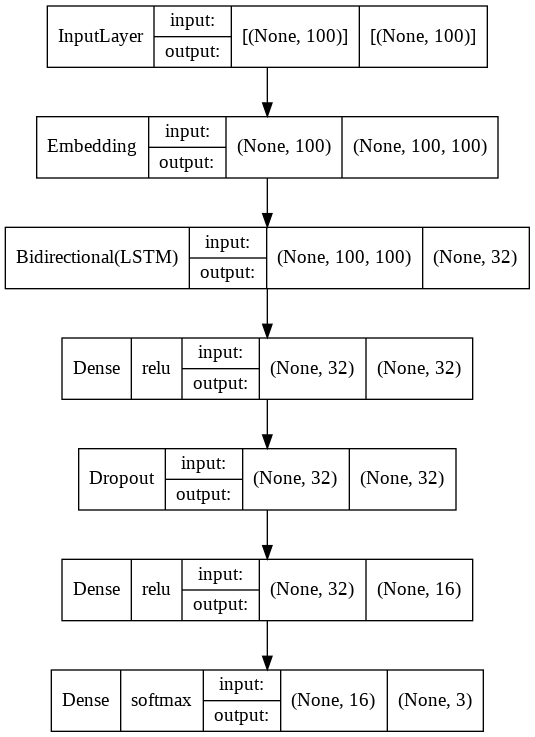

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)



In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
X_train_padded = np.array(X_train_padded)
y_train_labels = np.array(y_train)
X_test_padded = np.array(X_test_padded)
y_test_labels = np.array(y_test)

In [ ]:
import tensorflow as tf
y_train_labels_one_hot_encoded = tf.keras.utils.to_categorical(y_train_labels, 3)
y_test_labels_one_hot_encoded = tf.keras.utils.to_categorical(y_test_labels, 3)

In [ ]:
#Bi-LSTMs
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10), 


num_epochs = 100
history = model.fit(X_train_padded, y_train_labels_one_hot_encoded, epochs=num_epochs, validation_data=(X_test_padded, y_test_labels_one_hot_encoded), callbacks=[model_checkpoint_callback, early_stopping_callback])

Epoch 1/100
29/29 [==============================] - 41s 1s/step - loss: 1.5135 - accuracy: 0.4726 - val_loss: 1.3953 - val_accuracy: 0.5146
Epoch 2/100
29/29 [==============================] - 32s 1s/step - loss: 1.3366 - accuracy: 0.5372 - val_loss: 1.2626 - val_accuracy: 0.6117
Epoch 3/100
29/29 [==============================] - 32s 1s/step - loss: 1.2289 - accuracy: 0.6116 - val_loss: 1.1148 - val_accuracy: 0.7087
Epoch 4/100
29/29 [==============================] - 32s 1s/step - loss: 1.1148 - accuracy: 0.6575 - val_loss: 0.9738 - val_accuracy: 0.7379
Epoch 5/100
29/29 [==============================] - 33s 1s/step - loss: 0.9773 - accuracy: 0.7101 - val_loss: 0.9041 - val_accuracy: 0.7670
Epoch 6/100
29/29 [==============================] - 33s 1s/step - loss: 0.9103 - accuracy: 0.7166 - val_loss: 0.8663 - val_accuracy: 0.7573
Epoch 7/100
29/29 [==============================] - 32s 1s/step - loss: 0.8405 - accuracy: 0.7418 - val_loss: 0.8473 - val_accuracy: 0.7476
Epoch 8/100
2

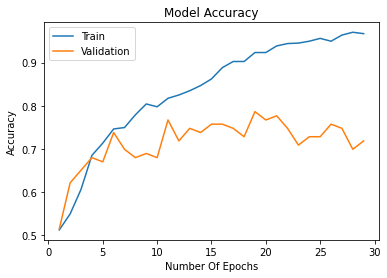

In [ ]:
#For Bidirectional LSTMs
import matplotlib.pyplot as plt

epochs=[x for x in range(1,30)]

plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Prediction for Bi-LSTM

In [ ]:
def preprocessSingleTweet(tweet):

    tweet = str(tweet)
    
    #Removing urls and stripping whitespaces
    tweet = re.sub(r'http\S+', '', str(tweet))
    tweet = tweet.strip()

    #Removing hashtags and mentions
    tweet = ' '.join([word for word in tweet.split() if word[0]!='@' and word[0]!='#'])


    #Removing Punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    #Lowercasing all texts, removing stopwords, and lemmatizing the texts
    stopwordsList = stopwords.words('english') 
    lemmatizer = WordNetLemmatizer()
    
    tweet = tweet.lower()
    tweet = ' '.join([word for word in tweet.split() if word not in stopwordsList])
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split()])

    return tweet

In [ ]:
def tokenize_and_predict(pre_processed_tweet):
    encoded_tweet = tokenizer.texts_to_sequences([pre_processed_tweet])[0]
    numpy_array_encoded_tweet = np.array([encoded_tweet])
    numpy_array_encoded_tweet_padded = pad_sequences(numpy_array_encoded_tweet,maxlen=max_length, padding=padding_type, truncating=truncation_type)
    pred = model.predict(numpy_array_encoded_tweet_padded, verbose=0)
    max_idx = np.argmax(pred[0])
    sentiment = 0
    if max_idx==1:
        sentiment = 1
    elif max_idx==2:
        sentiment = -1
    else:
        sentiment = 0
    return sentiment

In [ ]:
y_pred = []
for i in range(len(X)):
    clean_tweet = preprocessSingleTweet(X[i])
    y_pred.append(tokenize_and_predict(clean_tweet)) 

In [ ]:
y_pred = np.array(y_pred)

Clssification Report of Bi-LSTM

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

print("Classification Report:")
print(classification_report(y,y_pred))
print("\n")

print("Accuracy Score:")
print(accuracy_score(y,y_pred))
print("\n")

print("f1_score: ")
print(f1_score(y,y_pred, average='weighted'))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.74      0.81       368
         0.0       0.00      0.00      0.00       123
         1.0       0.71      0.95      0.81       526

    accuracy                           0.76      1017
   macro avg       0.53      0.57      0.54      1017
weighted avg       0.69      0.76      0.71      1017



Accuracy Score:
0.7610619469026548


f1_score: 
0.7119383601667815


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vader

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
# for i in range(len(X)):
#     score =  analyzer.polarity_scores(X[i])
#     maxKey = 'neu'
#     for j in range(3):
        


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sid.polarity_scores(X[0])

{'compound': -0.872, 'neg': 0.32, 'neu': 0.68, 'pos': 0.0}

In [ ]:
final_vader_probs = [1,2,3]
final_lstm_probs = [1,2,3]
final_vader_probs = np.array(final_vader_probs)
final_lstm_probs = np.array(final_lstm_probs)

final_sentiment_score = 3*final_lstm_probs + 4*final_vader_probs
print(np.argmax(final_sentiment_score))

2


In [ ]:
d = {"tweet": X, "sentiment": y}
df = pd.DataFrame(d)

In [ ]:
print(len(df))
df['sentiment'].value_counts()

1017


 1.0    526
-1.0    368
 0.0    123
Name: sentiment, dtype: int64

In [ ]:
import time
start = time.process_time()
df['scores'] = df["tweet"].apply(lambda tweet: sid.polarity_scores(tweet)) 
time_taken = time.process_time() - start

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 1.0 if c >0.0 else -1.0 if c <0.0 else 0.0)
print(time_taken)
df.head()

0.2473469210000001


,tweet,sentiment,scores,compound,comp_score
0,update chp said man killed monday night accele...,-1.0,"{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compou...",-0.8720,-1.0
1,another incredible close house vip car deliver...,1.0,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",0.9468,1.0
2,motorrad definition ce 04 siton made serve tra...,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0
3,tragedy concerned speeding driver killed partn...,-1.0,"{'neg': 0.56, 'neu': 0.44, 'pos': 0.0, 'compou...",-0.8720,-1.0
4,hi lyn sorry hear bmws repair dm u registratio...,-1.0,"{'neg': 0.072, 'neu': 0.608, 'pos': 0.32, 'com...",0.6705,1.0


Classification Report of Vader

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:")
print(confusion_matrix(df["sentiment"],df["comp_score"]))
print("\n")

print("Classification Report:")
print(classification_report(df["sentiment"],df["comp_score"]))
print("\n")

print("Accuracy Score:")
print(accuracy_score(df["sentiment"],df["comp_score"]))
print("\n")

print("f1_score: ")
print(f1_score(df["sentiment"],df["comp_score"], average='weighted'))

Confusion Matrix:
[[212  62  94]
 [ 19  51  53]
 [ 43 162 321]]


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.77      0.58      0.66       368
         0.0       0.19      0.41      0.26       123
         1.0       0.69      0.61      0.65       526

    accuracy                           0.57      1017
   macro avg       0.55      0.53      0.52      1017
weighted avg       0.66      0.57      0.60      1017



Accuracy Score:
0.5742379547689282


f1_score: 
0.6040250676513833
